In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

In [2]:
cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()


## Load Tidy Data

In [3]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
study_name = 'HPF-Exc'
mc_inte_tidy_data = pd.read_msgpack(
    f'/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithATAC/{study_name}/Integration/mc_cell_tidy_data.with_integration_info.msg'
)
cell_tidy_data = cell_tidy_data.reindex(mc_inte_tidy_data.index).copy()
cell_tidy_data['aggumap_0'] = mc_inte_tidy_data['aggumap_0']
cell_tidy_data['aggumap_1'] = mc_inte_tidy_data['aggumap_1']

atac_inte_tidy_data = pd.read_msgpack(
    f'/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithATAC/{study_name}/Integration/atac_cell_tidy_data.with_integration_info.msg'
)

In [5]:
atac_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/ATAC/Metadata/ATAC.cell_tidy_data.v2.msg'
)
atac_subtype_palette = atac_tidy_data.set_index('SubType')['L3Color'].to_dict()

In [6]:
atac_inte_tidy_data.head()

,Modality,leiden,umap_0,umap_1,pca_0,pca_1,tsne_0,tsne_1,SubType,co_cluster
Glutamate.CA1.CA1c1+0,atac,2,5.575840,-5.972029,0.636114,-0.499810,6.518465,-34.642498,Glutamate.CA1.CA1c1,2
Glutamate.CA1.CA1c1+1,atac,8,3.419887,-9.386470,0.543977,-0.565497,14.115990,-19.023396,Glutamate.CA1.CA1c1,8
Glutamate.CA1.CA1c1+10,atac,2,6.495831,-7.788896,0.482190,-0.441996,15.909364,-42.302107,Glutamate.CA1.CA1c1,2
Glutamate.CA1.CA1c1+100,atac,2,7.049761,-6.252554,0.597919,-0.449814,9.672108,-39.671049,Glutamate.CA1.CA1c1,2
Glutamate.CA1.CA1c1+102,atac,2,5.397702,-5.937317,0.336368,-0.318667,-0.279725,-28.033656,Glutamate.CA1.CA1c1,2


In [7]:
cell_tidy_data.shape, atac_inte_tidy_data.shape

((13949, 56), (1757, 10))

## Plot

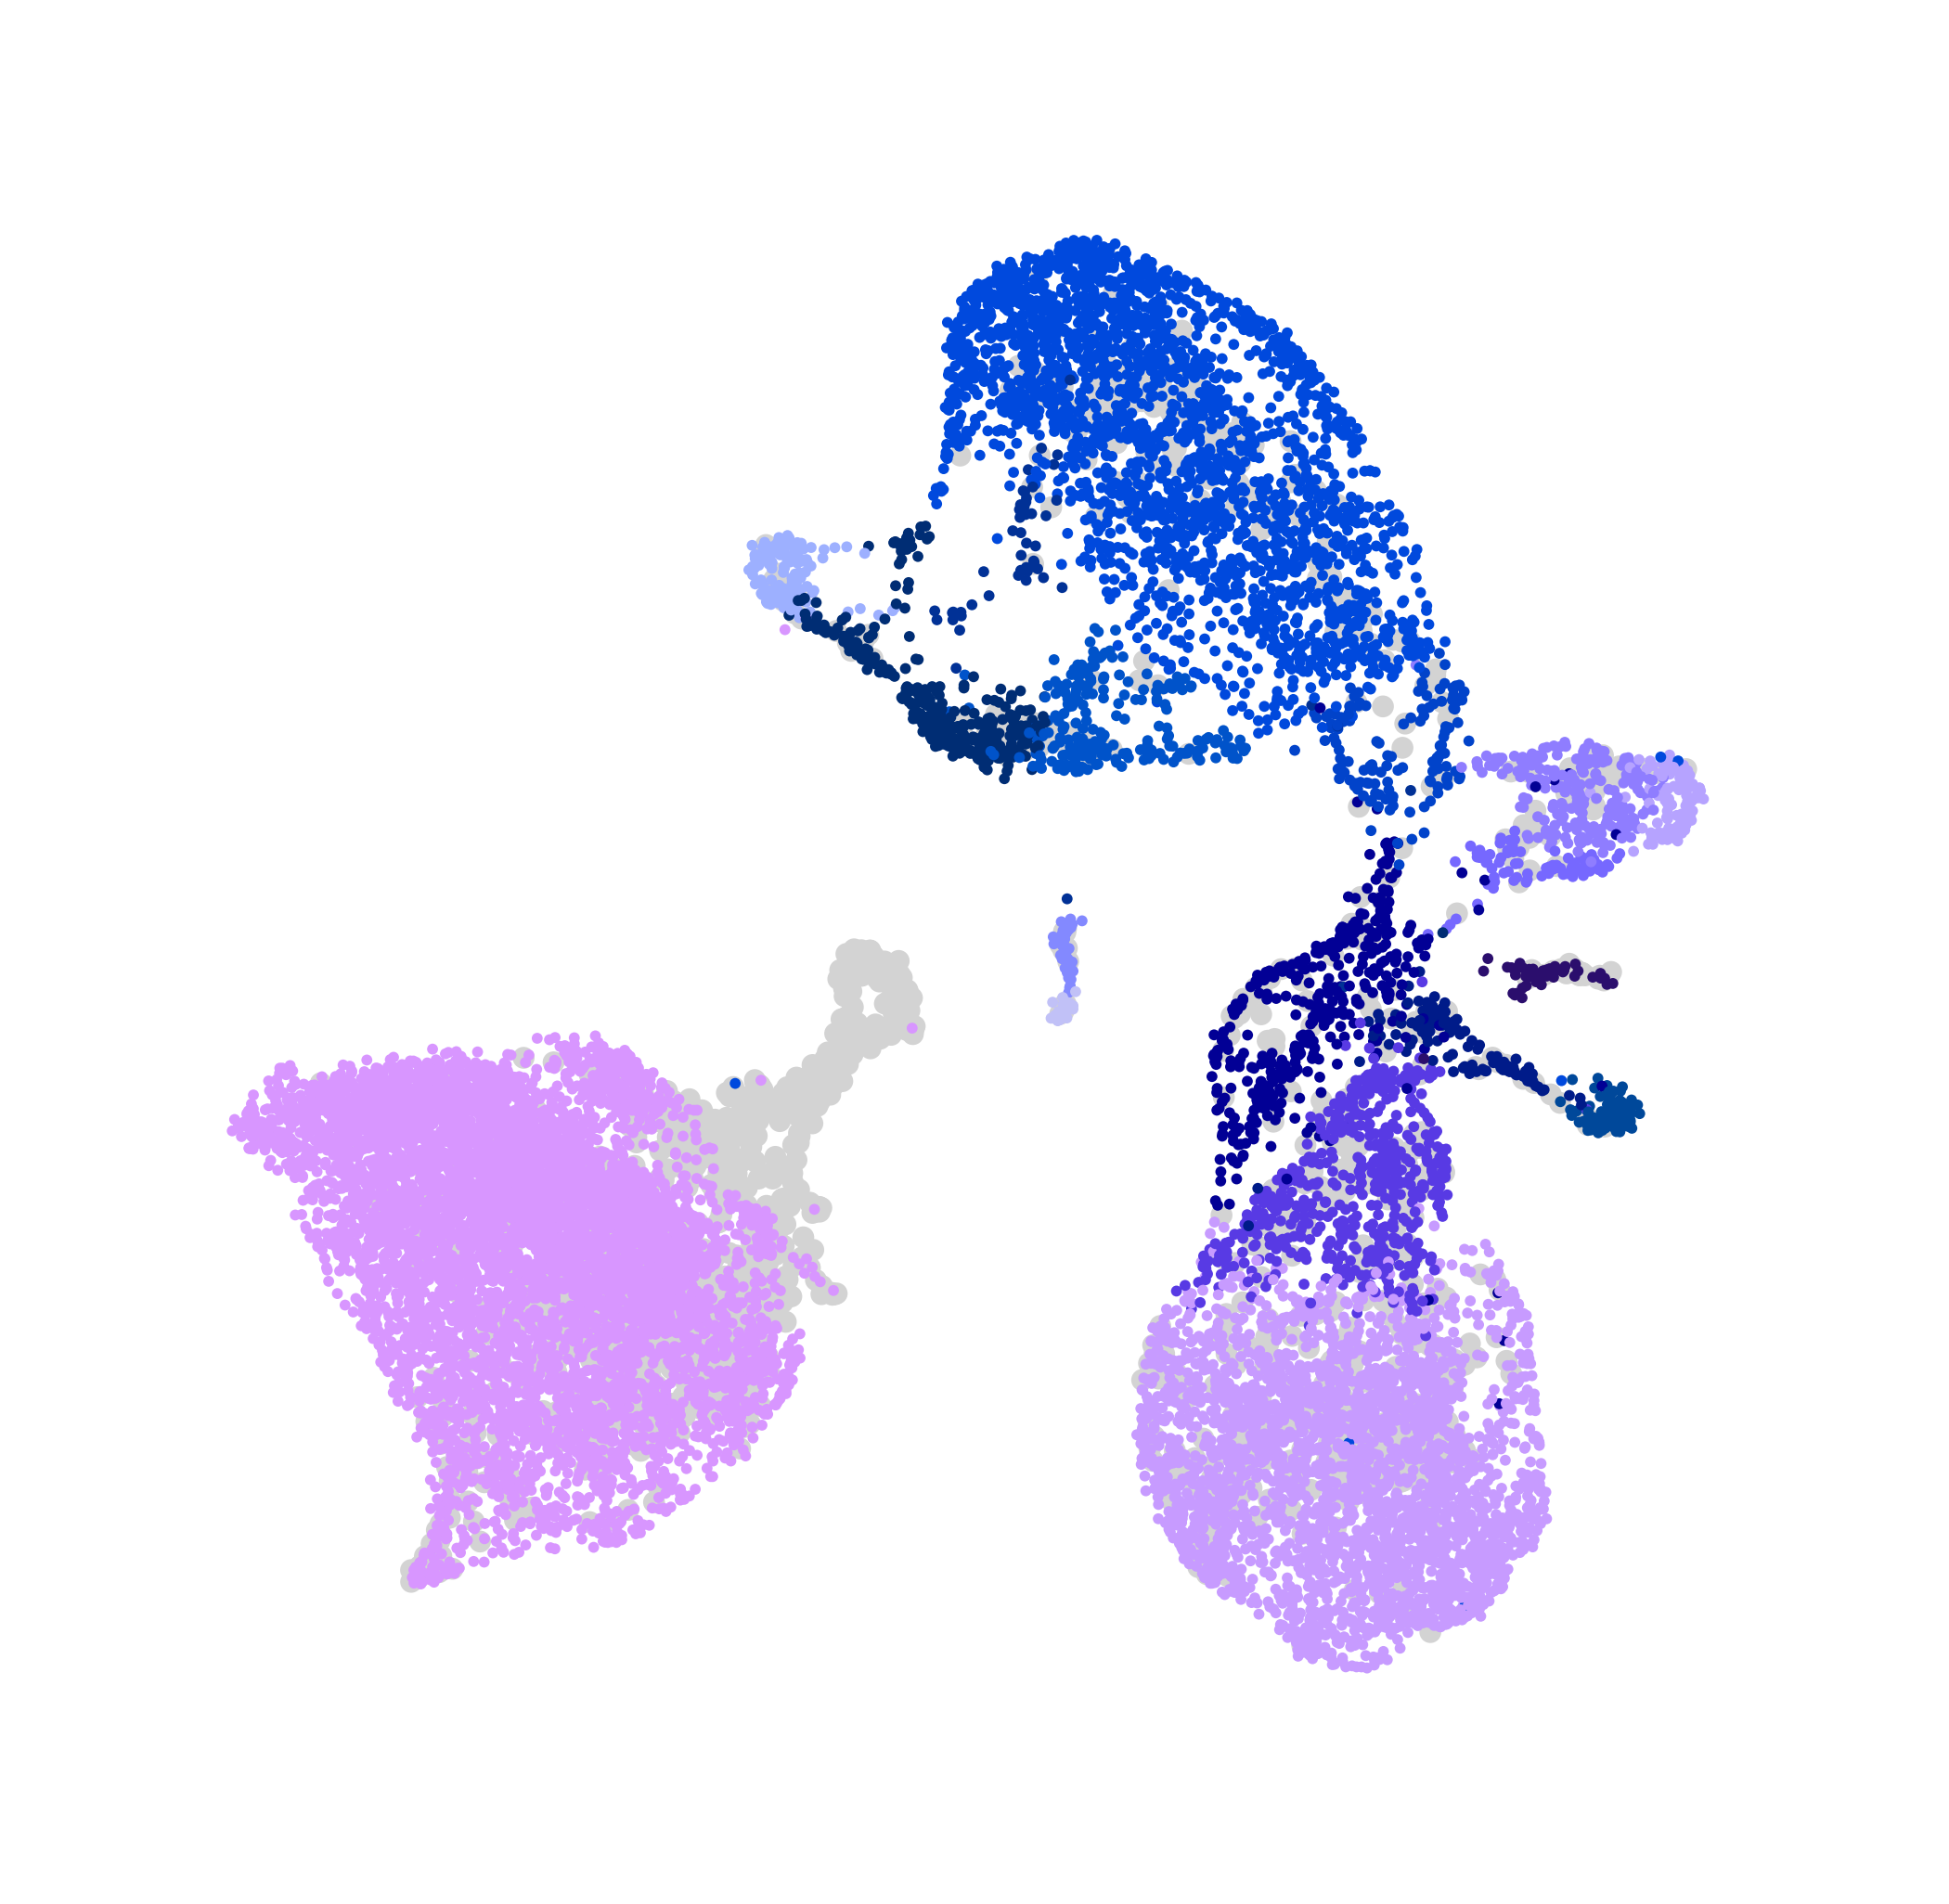

In [9]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax, data=atac_inte_tidy_data, coord_base='umap', 
                    hue=None, scatter_kws=dict(color='lightgray'),
                    max_points=None, s=2, axis_format=None)

categorical_scatter(ax=ax, data=cell_tidy_data, coord_base='aggumap', 
                    hue='SubType', palette=sub_type_palette,
                    max_points=None, s=0.5, axis_format=None)
fig.savefig(f'{study_name}.mc_subtype.png')
pass

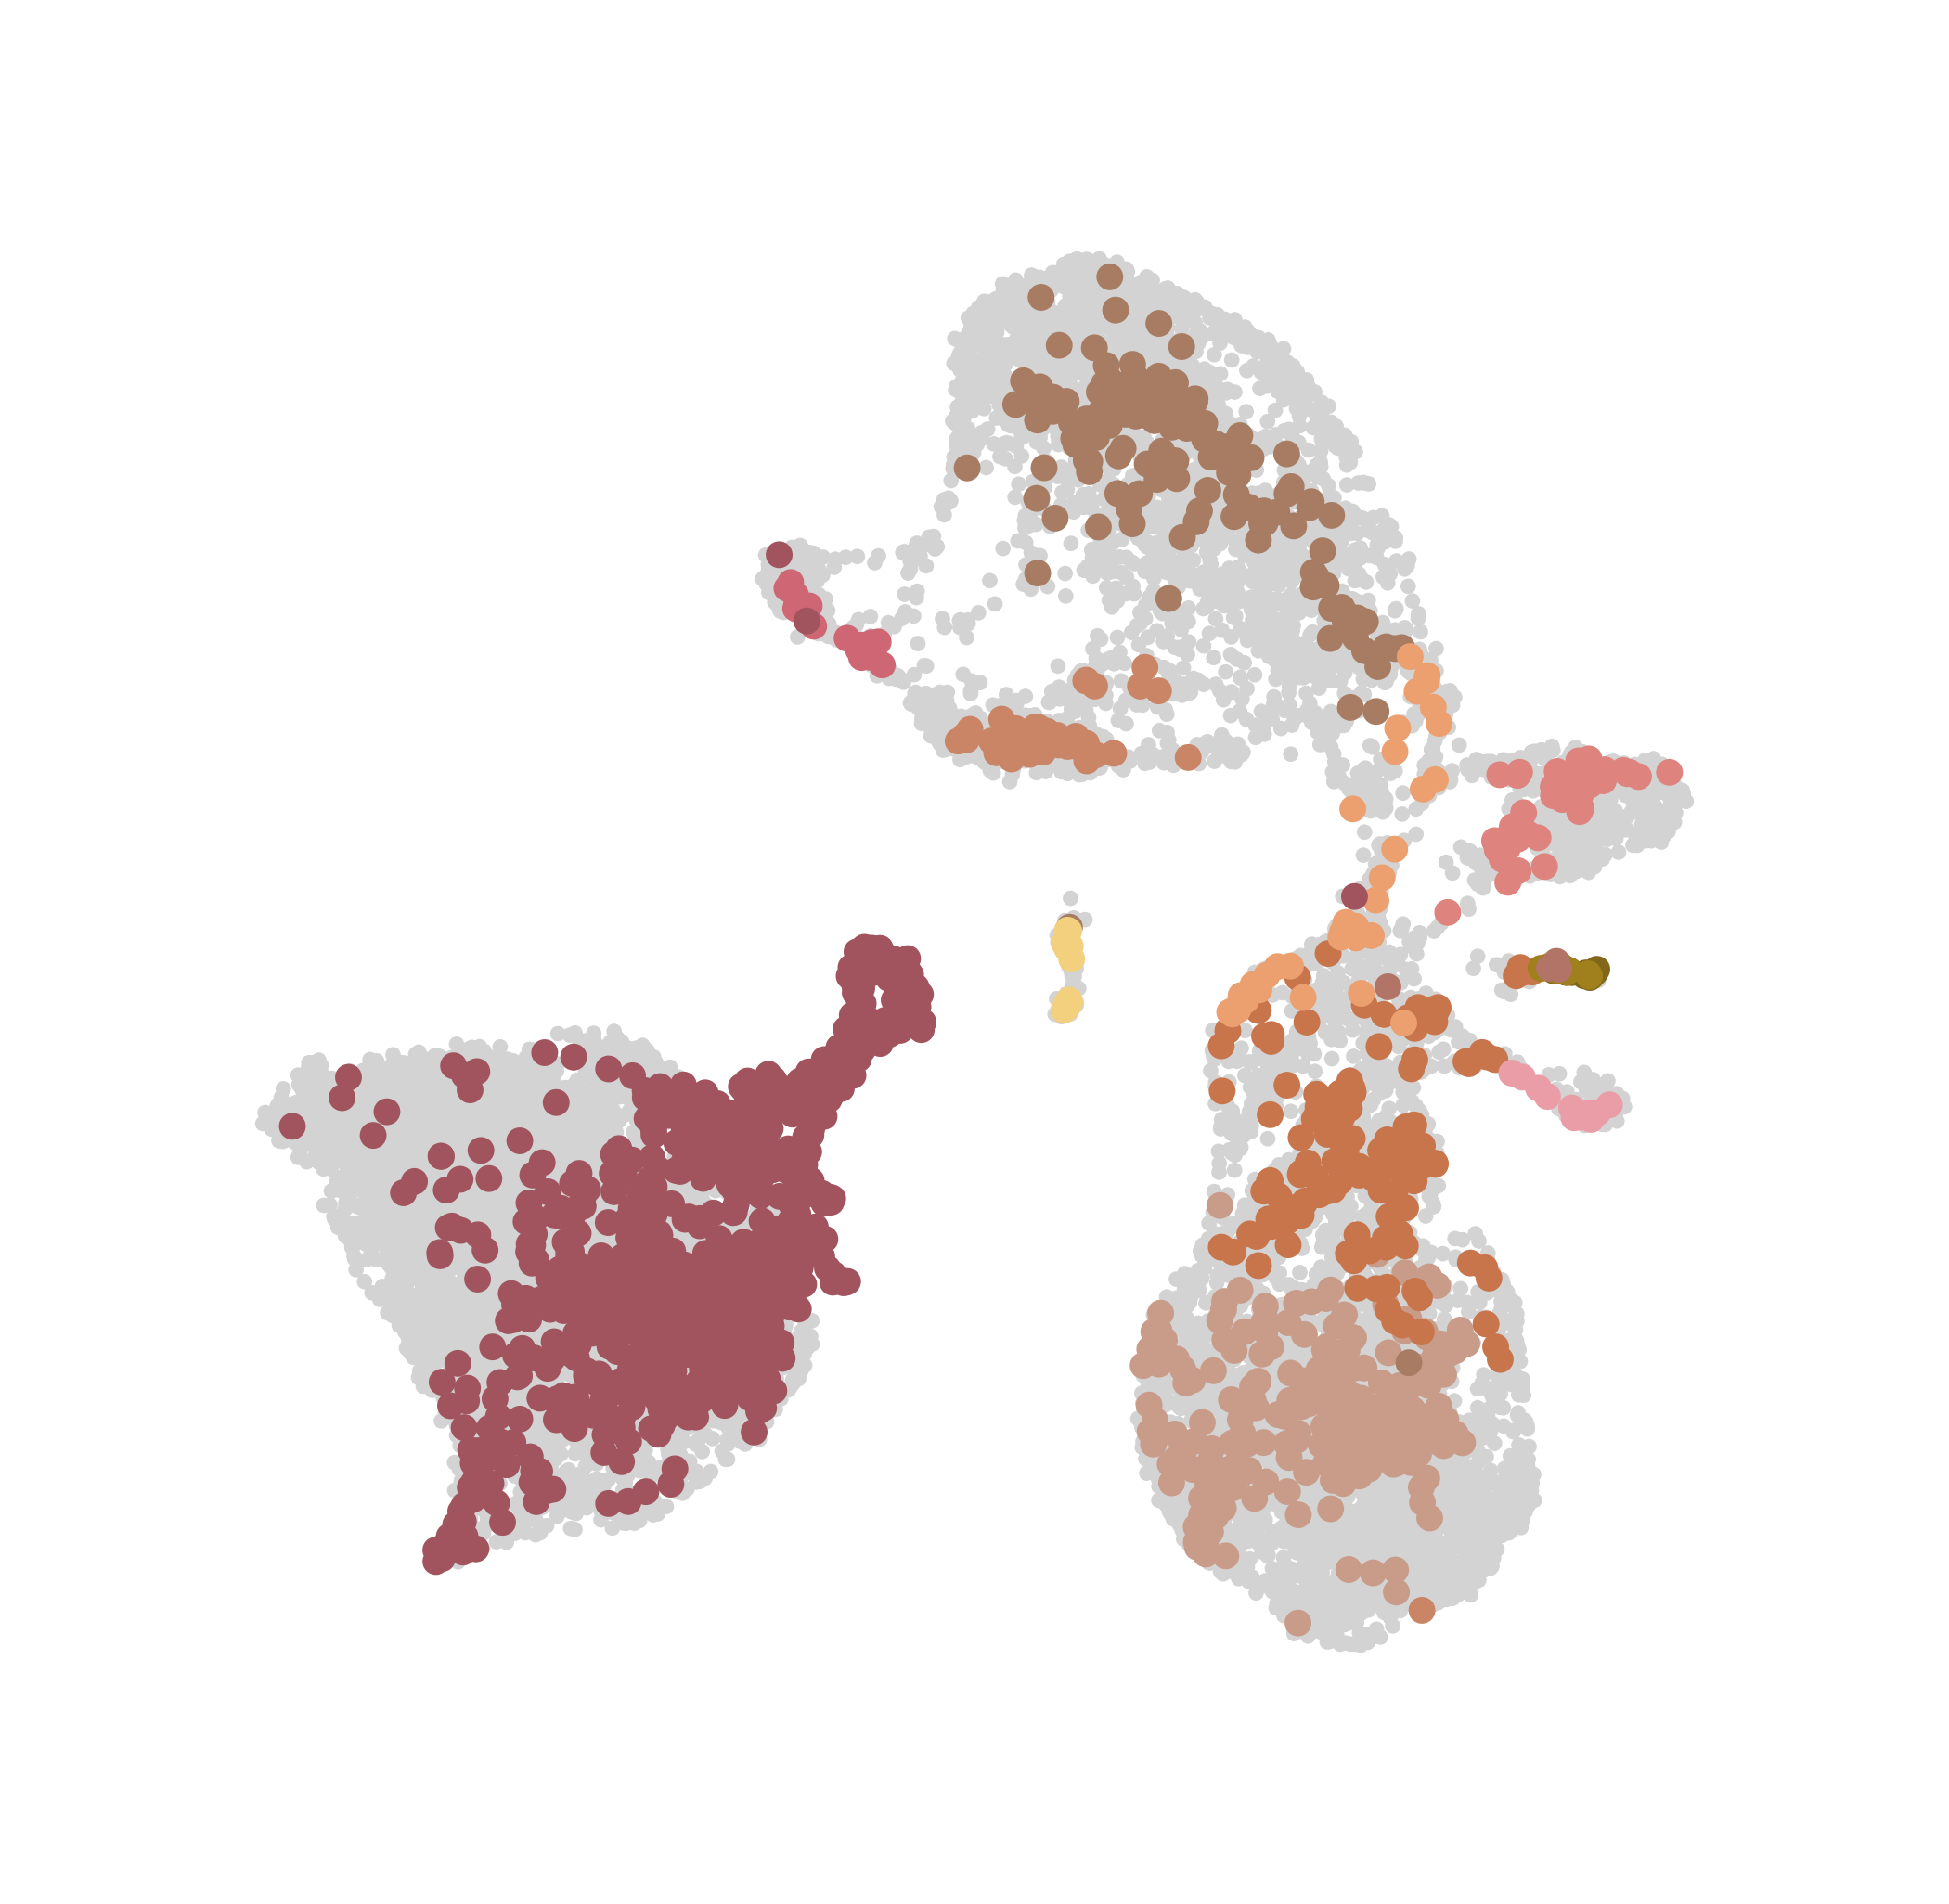

In [10]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax, data=cell_tidy_data, coord_base='aggumap', 
                    hue=None, scatter_kws=dict(color='lightgray'),
                    max_points=None, s=1, axis_format=None)

categorical_scatter(ax=ax, data=atac_inte_tidy_data, coord_base='umap', 
                    hue='SubType', palette=atac_subtype_palette,
                    max_points=None, s=3, axis_format=None)
fig.savefig(f'{study_name}.atac_subtype.png')


In [11]:
from cemba_data.tools.integration.utilities import calculate_direct_confusion

In [12]:
cfm = calculate_direct_confusion(mc_inte_tidy_data[['SubType', 'co_cluster']], 
                                 atac_inte_tidy_data[['SubType', 'co_cluster']])

In [13]:
cfm.to_csv(f'{study_name}.cfm.csv')

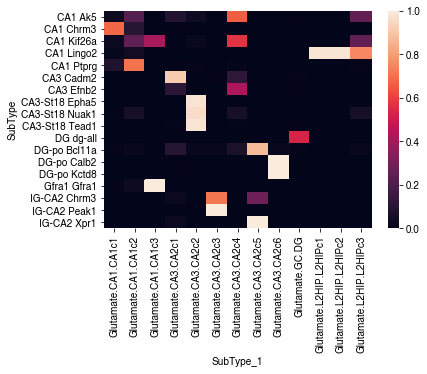

In [14]:
sns.heatmap(cfm)